# IMPORT PACKAGES

In [2]:
!pip install  scikit-learn==0.20.3
!pip install  pandas==0.24.2
!pip install  numpy==1.16.3
!pip install  nltk==3.3
!pip install  matplotlib==2.2.2
!pip install  gensim==3.5.0

  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.21.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy\\compat\\py3k.py'
Consider using the `--user` option or check the permissions.



  Stored in directory: C:\Users\axf0409\AppData\Local\pip\Cache\wheels\d1\ab\40\3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk
  Found existing installation: nltk 3.4.4
    Uninstalling nltk-3.4.4:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\nltk-3.4.4.dist-info\\INSTALLER'
Consider using the `--user` option or check the permissions.



  Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\pylab.cpython-37.pyc'
Consider using the `--user` option or check the permissions.



  Stored in directory: C:\Users\axf0409\AppData\Local\pip\Cache\wheels\26\7b\c6\8f29903415a88fc8c9fb99c6c027684d5ce7e6da98cf71a5b9
  Stored in directory: C:\Users\axf0409\AppData\Local\pip\Cache\wheels\5f\ea\fb\5b1a947b369724063b2617011f1540c44eb00e28c3d2ca8692
Successfully built gensim smart-open


In [33]:
# data exploration and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy import interp


# misc toolkit
import warnings
warnings.filterwarnings('ignore')
import itertools


# ml toolkit
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# natural language toolkit
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import nltk
nltk.download('wordnet')
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\axf0409\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# query bq using pandas
def bq_table_to_df(sql, project='analytics-assrt-planning-thd'):
    return pd.read_gbq(sql, project_id=project, dialect = 'standard', verbose=False)

def lem_stem(text):
    return stemmer.stem(lm.lemmatize(text, pos='v'))

# for every word in our document lemmatize & stem, remove stop words
def tokenize_lemmatize(text):
    return [lem_stem(token) for token in gensim.utils.simple_preprocess(text) if token not in gensim.parsing.preprocessing.STOPWORDS]

# GRAB MODELING DATA FROM BIGQUERY

In [45]:
# grabbing a subset of data

sql="""
SELECT A.*
FROM `pr-supply-chain-thd.TEMP_BQA.SMRT_HM_TRAIN_TASK_ID_22576` A
INNER JOIN
  `pr-edw-views-thd.SHARED.SKU_HIER_FD` B
ON A.SKU_NBR = B.SKU_NBR
AND A.SKU_CRT_DT = B.SKU_CRT_DT
AND B.SUB_DEPT_NBR NOT IN ('0030','029A')

"""
df_train=bq_table_to_df(sql)

In [38]:
sql="""
SELECT *
FROM `pr-supply-chain-thd.TEMP_BQA.SMRT_HM_TRAIN_TASK_ID_22576`
"""

df_train=bq_table_to_df(sql)

# Preview Train Table

In [39]:
# preview dataframe
print(df_train.shape)
df_train.head()

(13968, 5)


,SKU_NBR,SKU_CRT_DT,SKU_KEY,ATTR_VAL_LIST,SMART_HM_C
0,509711,1999-06-10,50971119990610,THESE ROSETTES ARE CONSTRUCTED FROM STEEL AND...,0
1,469434,1999-06-10,46943419990610,"PRIME-LINE, U 9966, REPLACEMENT LOCK CYLINDER...",0
2,585736,2002-12-11,58573620021211,"UL LISTED, THE CORDELIA LIGHTING WALL-MOUNT O...",0
3,487141,2002-12-11,48714120021211,"RHEEM WATER HEATERS, SHORT HEIGHTS AND SMALL ...",0
4,585722,2002-12-11,58572220021211,STEEL HOUSING IS MADE FOR OUTDOOR INSTALLATIO...,0


# Preprocess Data

### Tokenizer
is, a function that will split your text into single words and removes punctuation

### Lemmatizer
words in third-person are changed to first person, and verbs in past and future tenses are changed into present (for example, goes, went, and gone all become go).

### Stemmer
removes the inflection, reducing the word to its root (for example, shoes becomes shoe).

In [47]:
# create an instance of a tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# create an instance of a lemmatizer
lm = WordNetLemmatizer()

# create an instance of a stemmer
stemmer = SnowballStemmer("english")


# term frequency id vectorizer
tfv = TfidfVectorizer(
#              min_df=3 # minimum document frequency (ignores words lower than threshold)
#             ,max_features=None # if not none builds vocab that only considers top features across corpus
#             ,strip_accents='unicode' # remove accents and perform other character normalization
#             ,analyzer='word' # determines if the feaeture should be made of word or something else
#             ,token_pattern=r'\w+' # token pattern determines what is a token
#              tokenizer=tokenize_lemmatize # use custom tokenizer to perform stemming/lemm/tokenization
#             ,ngram_range=(1, 1) # (1, 3) outputs 1 & 3 word tokens
#             ,use_idf=1 
#             ,smooth_idf=1
    
             min_df=1
            ,ngram_range=(1, 1)       
            ,tokenizer=tokenize_lemmatize
            ,max_features=None
            )

# fit to this dataset to learn features
tfv.fit(df_train['ATTR_VAL_LIST'])

# with the fitted tfidf object transform 
# the datasets into matrixes
df_train_x=tfv.transform(df_train['ATTR_VAL_LIST'])

# Investigate Data Preprocessing

Some great in depth analysis and examples of exploring what is happening under the hood wheh completing Tf-Idf-Vectorization



[https://buhrmann.github.io/tfidf-analysis.html](url_here)

In [41]:
# used as part of the other functions
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [42]:
# show the top N words used in the given document of our matrix
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)


# we can see that this document seems to be about a metal or something containing zinc
top_feats_in_doc(df_train_x, tfv.get_feature_names(), 1, 10)

,feature,tfidf
0,key,0.353601
1,zinc,0.349395
2,prime,0.330694
3,rim,0.324199
4,cylind,0.285713
5,die,0.229448
6,lock,0.195057
7,cast,0.186242
8,brass,0.185882
9,line,0.166532


In [43]:
# calling this with grp_ids=None will return the most important
# words across the whole corpus
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)



print('Overall Top Features Across the Corpus: \n')
top_mean_feats(df_train_x, tfv.get_feature_names())

Overall Top Features Across the Corpus: 



,feature,tfidf
0,light,0.043241
1,water,0.019861
2,lead,0.019040
3,door,0.017851
4,oven,0.016336
5,cook,0.015384
6,shower,0.013561
7,wash,0.012827
8,cycl,0.012557
9,mirror,0.012227


For shared tokens across classes this tells us a little bit about how a classifier may predict which class the observation will end up

Top features by Class: 

Class 0
Class 1


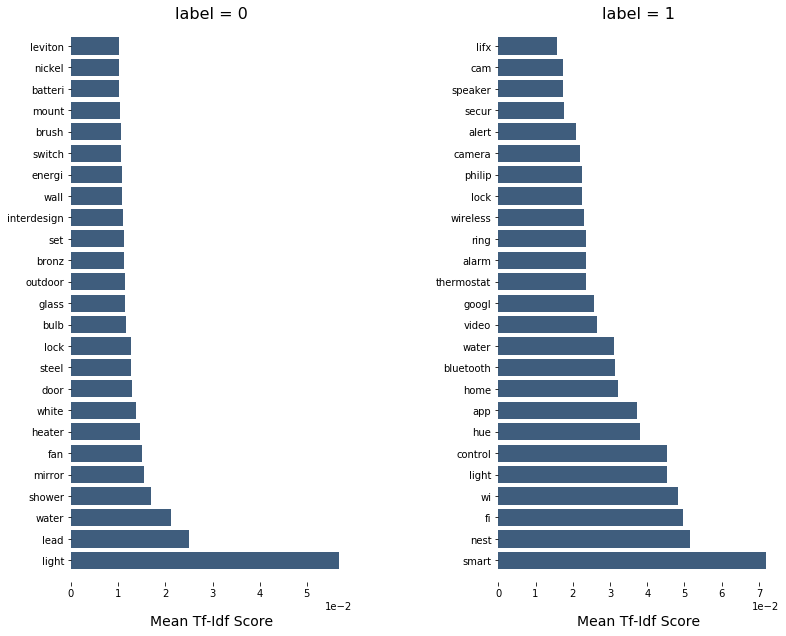

In [48]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):

        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))

        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)

    plt.show()


# returns a pair of dataframes by class and there top features
print('Top features by Class: \n')

by_class = top_feats_by_class(df_train_x, df_train['SMART_HM_C'], tfv.get_feature_names())


for df in by_class:
    print('Class {}'.format(df.label))
plot_tfidf_classfeats_h(by_class)